In [62]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import catboost

In [90]:
df = pd.read_excel("var5.xlsx", engine='openpyxl')
df.head()

,Успех,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Кількість відгуків в гуглі,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,не успішний,9.0,1,МАФ,2,NaN,571.0,1.56,12679.0,14910.0,0,0,0,0,0
1,не успішний,30.0,1,МАФ,2,8.0,1197.0,2.03,12800.0,9030.0,0,0,0,0,0
2,не успішний,15.0,1,МАФ,2,NaN,402.0,1.81,77106.0,9030.0,0,0,0,0,0
3,не успішний,20.0,1,МАФ,2,NaN,1036.0,2.18,0.0,13930.0,0,0,0,0,0
4,не успішний,30.0,1,Вбудоване приміщення,2,NaN,513.0,1.63,0.0,14560.0,0,0,0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Успех                             69 non-null     object 
 1   Площадь загальна кв.м             69 non-null     float64
 2   Этаж                              69 non-null     int64  
 3   Тип                               69 non-null     object 
 4   Количество сотрудников в штаті    69 non-null     int64  
 5   Кількість відгуків в гуглі        39 non-null     float64
 6   Количество чеков                  62 non-null     float64
 7   Среднее количество единиц в чеке  62 non-null     float64
 8   Автомобілів в день                64 non-null     float64
 9   Середній дохід населення          64 non-null     float64
 10  Внутрішньоквартальна дорога       69 non-null     int64  
 11  Прогулянкова зона                 69 non-null     int64  
 12  Якість пок

## Null values

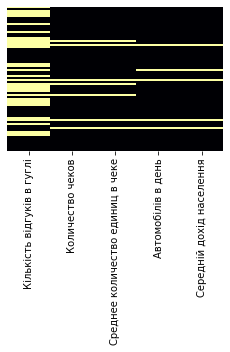

In [92]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

Заполним недостающие значения средним значением

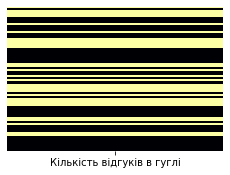

In [93]:
df['Количество чеков'] = df['Количество чеков'].fillna(df['Количество чеков'].mean())
df['Среднее количество единиц в чеке'] = df['Среднее количество единиц в чеке'].fillna(df['Среднее количество единиц в чеке'].mean())
df['Автомобілів в день'] = df['Автомобілів в день'].fillna(df['Автомобілів в день'].mean())
df['Середній дохід населення'] = df['Середній дохід населення'].fillna(df['Середній дохід населення'].mean())
fig = plt.figure()
ax = fig.add_axes([0, 0, 0.5, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > 1].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),
            cbar=False, yticklabels=False, cmap='inferno', ax=ax)
plt.show()

Мы не будем использывать информацию о количестве отзывов в гугле так как у нас очень много неизвестных данных.

In [94]:
df = df.drop(columns=['Кількість відгуків в гуглі'])
df

,Успех,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,не успішний,9.00,1,МАФ,2,571.0,1.56,12679.0,14910.0,0,0,0,0,0
1,не успішний,30.00,1,МАФ,2,1197.0,2.03,12800.0,9030.0,0,0,0,0,0
2,не успішний,15.00,1,МАФ,2,402.0,1.81,77106.0,9030.0,0,0,0,0,0
3,не успішний,20.00,1,МАФ,2,1036.0,2.18,0.0,13930.0,0,0,0,0,0
4,не успішний,30.00,1,Вбудоване приміщення,2,513.0,1.63,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,МАФ,6,6669.0,1.89,146.0,9800.0,1,0,0,0,0
65,успішний,27.26,1,МАФ,4,2877.0,1.85,6661.0,12600.0,0,0,0,0,0
66,не успішний,148.91,1,МАФ,2,2146.0,1.99,9500.0,10570.0,0,1,0,0,0
67,не успішний,50.93,1,Вбудоване приміщення,3,413.0,1.73,0.0,12460.0,0,0,0,0,0


## Encoding

In [95]:
df.Успех.value_counts()

не успішний    44
успішний       25
Name: Успех, dtype: int64

In [96]:
df.Тип.value_counts()

МАФ                     39
Вбудоване приміщення    29
Острівок на ринку        1
Name: Тип, dtype: int64

In [97]:
df.Этаж.value_counts()

1    69
Name: Этаж, dtype: int64

In [98]:
type_ = {'МАФ':0,'Вбудоване приміщення':1, 'Острівок на ринку':2}
df['Тип'] = df['Тип'].map(type_)
df

,Успех,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,не успішний,9.00,1,0,2,571.0,1.56,12679.0,14910.0,0,0,0,0,0
1,не успішний,30.00,1,0,2,1197.0,2.03,12800.0,9030.0,0,0,0,0,0
2,не успішний,15.00,1,0,2,402.0,1.81,77106.0,9030.0,0,0,0,0,0
3,не успішний,20.00,1,0,2,1036.0,2.18,0.0,13930.0,0,0,0,0,0
4,не успішний,30.00,1,1,2,513.0,1.63,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,успішний,51.77,1,0,6,6669.0,1.89,146.0,9800.0,1,0,0,0,0
65,успішний,27.26,1,0,4,2877.0,1.85,6661.0,12600.0,0,0,0,0,0
66,не успішний,148.91,1,0,2,2146.0,1.99,9500.0,10570.0,0,1,0,0,0
67,не успішний,50.93,1,1,3,413.0,1.73,0.0,12460.0,0,0,0,0,0


In [99]:
type_ = {'не успішний':0,'успішний':1}
df['Успех'] = df['Успех'].map(type_)
df

,Успех,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,0,9.00,1,0,2,571.0,1.56,12679.0,14910.0,0,0,0,0,0
1,0,30.00,1,0,2,1197.0,2.03,12800.0,9030.0,0,0,0,0,0
2,0,15.00,1,0,2,402.0,1.81,77106.0,9030.0,0,0,0,0,0
3,0,20.00,1,0,2,1036.0,2.18,0.0,13930.0,0,0,0,0,0
4,0,30.00,1,1,2,513.0,1.63,0.0,14560.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1,51.77,1,0,6,6669.0,1.89,146.0,9800.0,1,0,0,0,0
65,1,27.26,1,0,4,2877.0,1.85,6661.0,12600.0,0,0,0,0,0
66,0,148.91,1,0,2,2146.0,1.99,9500.0,10570.0,0,1,0,0,0
67,0,50.93,1,1,3,413.0,1.73,0.0,12460.0,0,0,0,0,0


## Chouse features

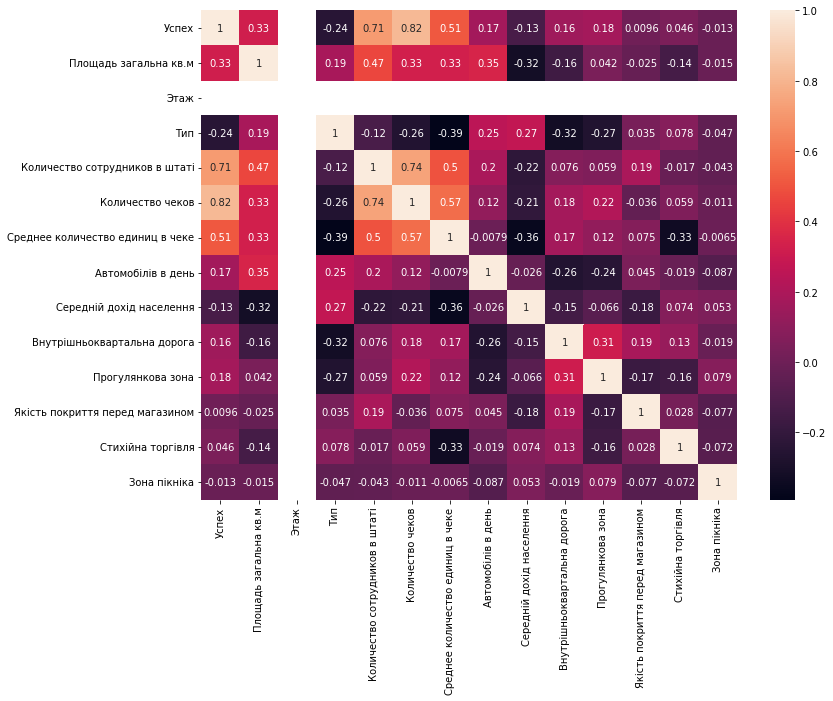

In [100]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

# Classification Tree & Ensembles

In [33]:
features = ['Количество чеков', 'Среднее количество единиц в чеке']
X =df[features]
y = df['Успех']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [34]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

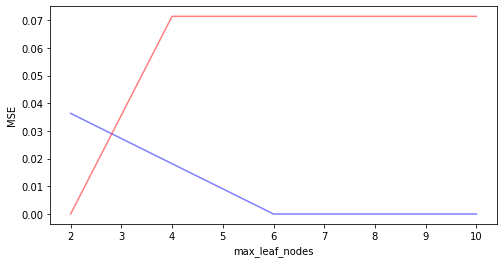

In [35]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

## Model

In [36]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 3, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

## Result

In [37]:
# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.9285714285714286

In [38]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 0  3]]


In [39]:
df.drop(columns=['Успех']).columns

Index(['Площадь загальна кв.м', 'Этаж', 'Тип',
       'Количество сотрудников в штаті', 'Количество чеков',
       'Среднее количество единиц в чеке', 'Автомобілів в день',
       'Середній дохід населення', 'Внутрішньоквартальна дорога',
       'Прогулянкова зона', 'Якість покриття перед магазином',
       'Стихійна торгівля', 'Зона пікніка'],
      dtype='object')

Text(0.5, 1.0, 'Boosting. Feature Importance')

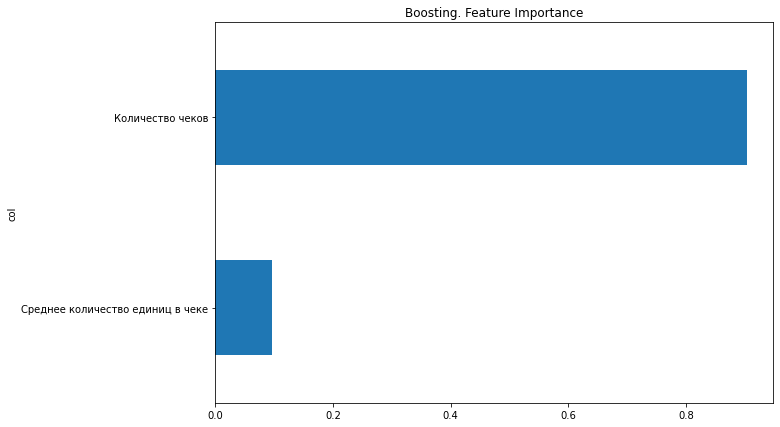

In [42]:
# Features importances
col = features
ct_imp = pd.DataFrame({'imp': ct.feature_importances_, 'col': col})
ct_imp = ct_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
ct_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

## Visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


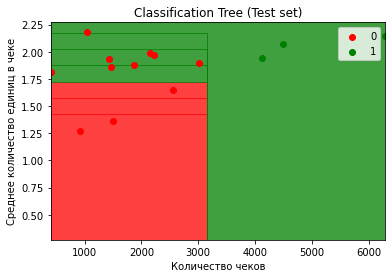

In [46]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Среднее количество единиц в чеке'].min() - 1, stop = X_set['Среднее количество единиц в чеке'].max() + 1))
plt.contourf(X1, X2, ct.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Среднее количество единиц в чеке'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Classification Tree (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

# Forest


## Paremeters

In [47]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

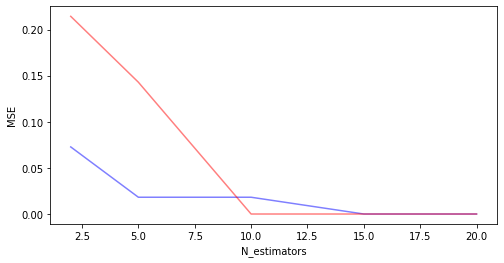

In [48]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [49]:
def rf_max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

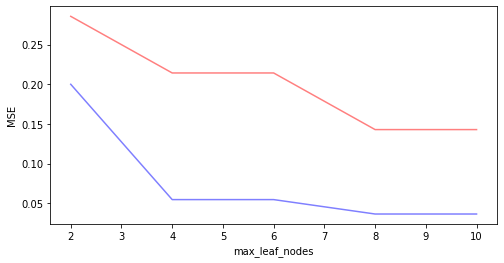

In [50]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

## Model

In [52]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 9, max_leaf_nodes = 8, random_state = 10).fit(X_train, y_train)

## Results

In [53]:
# Predicting the Test set results
y_pred = rf.predict(X_test)
y_pred = (y_pred > 0.5)
rf.score(X_test,y_test).round(3)

1.0

In [54]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11  0]
 [ 0  3]]


Text(0.5, 1.0, 'Boosting. Feature Importance')

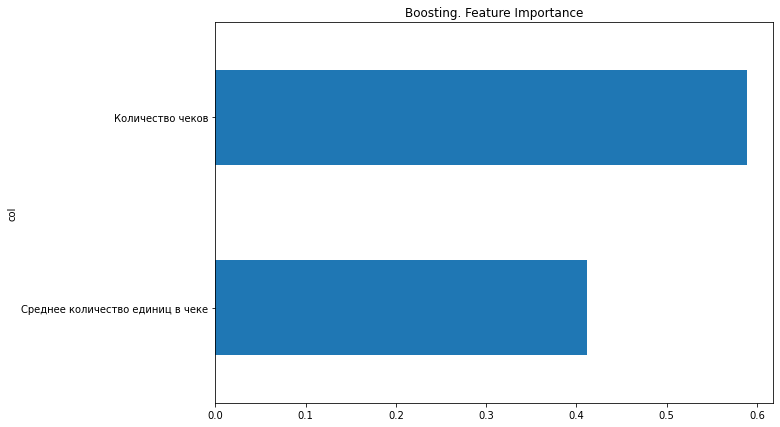

In [56]:
# Features importances
rf_imp = pd.DataFrame({'imp': rf.feature_importances_, 'col': col})
rf_imp = rf_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
rf_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

# Visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


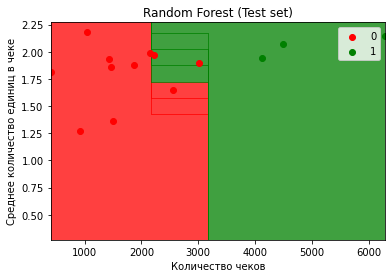

In [59]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Среднее количество единиц в чеке'].min() - 1, stop = X_set['Среднее количество единиц в чеке'].max() + 1))
plt.contourf(X1, X2, rf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Среднее количество единиц в чеке'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

# CatBoost

## Paremeters

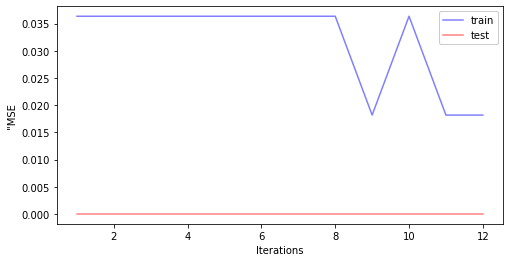

In [63]:
def catboost_best_iterations(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=i,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel('"MSE')
    ax.set_xlabel('Iterations')
    ax.legend(framealpha=1, frameon=True);
    
from catboost import CatBoostClassifier
catboost_best_iterations(X_train, X_test, y_train, y_test, list(range(1,13)))

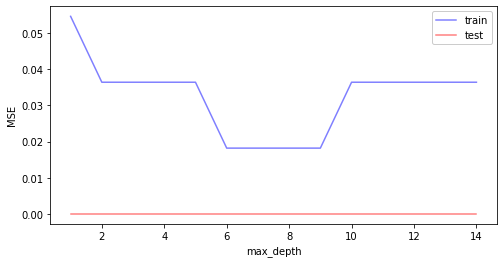

In [64]:
def catboost_max_depth(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        catboost = CatBoostClassifier(iterations=12,max_depth=i,random_state=10).fit(X_train,y_train,eval_set=(X_test, y_test),logging_level='Silent')
        mse_train.append(mean_squared_error(y_train, catboost.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, catboost.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_depth")
    ax.legend(framealpha=1, frameon=True);

catboost_max_depth(X_train, X_test, y_train, y_test, list(range(1,15)))

## Model

In [65]:
# Fitting CatBoost to the Training set
cb = CatBoostClassifier(iterations=12,max_depth=6,random_state=10).fit(X_train, y_train,eval_set=(X_test, y_test),logging_level='Silent')

## Results

In [66]:
# Predicting the Test set results
cb_y_pred = cb.predict(X_test)
cb.score(X_test,y_test).round(3)

1.0

In [67]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, cb_y_pred)
print(cm)

[[11  0]
 [ 0  3]]


Text(0.5, 1.0, 'Boosting. Feature Importance')

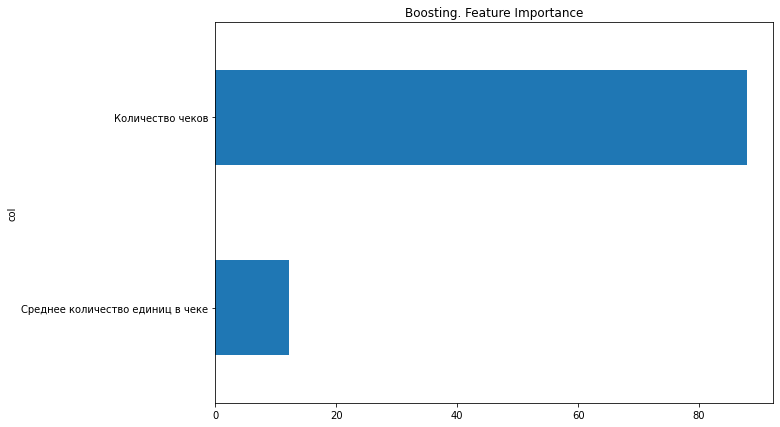

In [68]:
# Features importances
cb_imp = pd.DataFrame({'imp': cb.get_feature_importance(), 'col': col})
cb_imp = cb_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-25:]
cb_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Boosting. Feature Importance')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


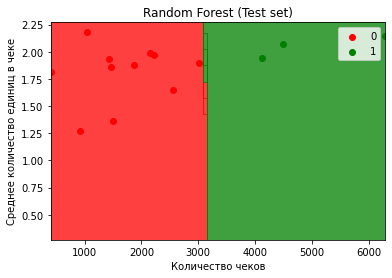

In [69]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set['Количество чеков'].min() - 1, stop = X_set['Количество чеков'].max() + 1),
                     np.arange(start = X_set['Среднее количество единиц в чеке'].min() - 1, stop = X_set['Среднее количество единиц в чеке'].max() + 1))
plt.contourf(X1, X2, cb.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set['Количество чеков'][y_set == j], X_set['Среднее количество единиц в чеке'][y_set == j],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Количество чеков')
plt.ylabel('Среднее количество единиц в чеке')
plt.legend()
plt.show()

Самый лучший результат классификации мы получили используя CatBoostClassifier

# Hierarchical Clustering

In [101]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df_arr = sc.transform(df)

In [102]:
df = pd.DataFrame(df_arr, columns=df.columns).round()

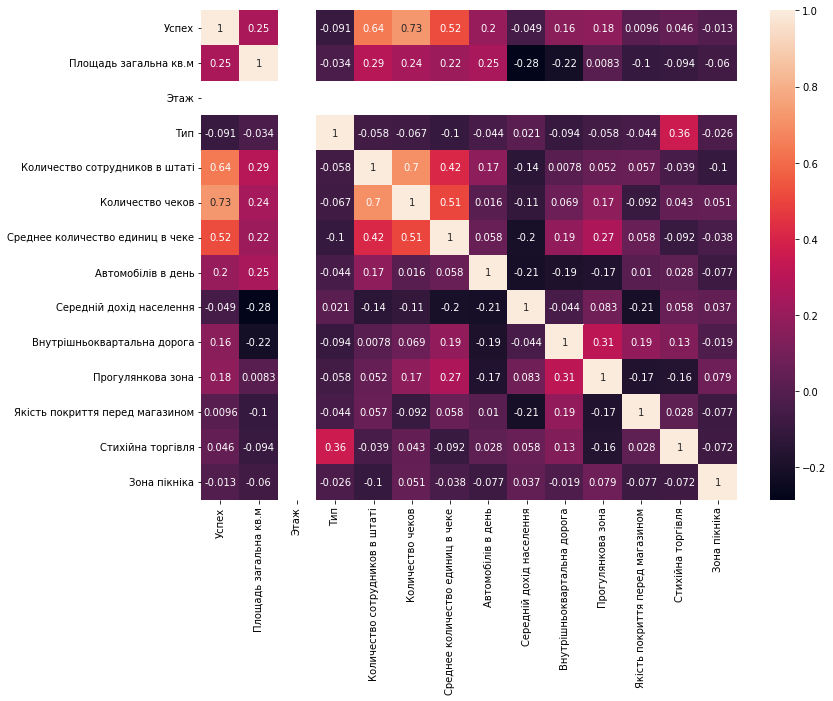

In [104]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

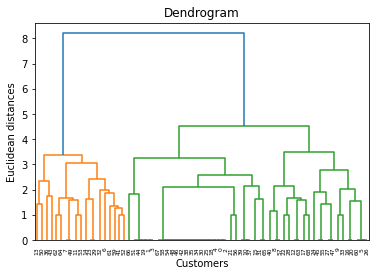

In [105]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 2 или 3

In [138]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [139]:
hc

array([2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1,
       2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2,
       2, 2, 0])

# Feature Reduction

In [130]:
X = df.iloc[:, [0, 5, 6]]

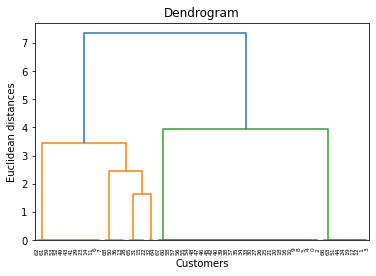

In [131]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Исходя из графика можно сказть что подходящее количество классов это 2 

In [132]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [133]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('clust.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

# K-Means Clustering

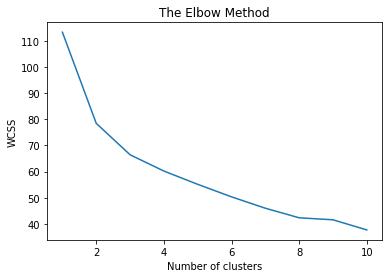

In [123]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

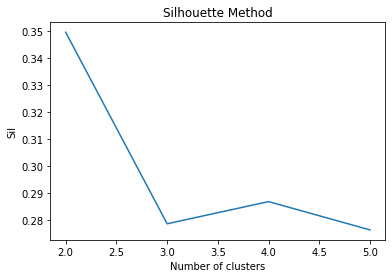

2:0.34966627043681764
3:0.2785154300733889
4:0.286745123408112
5:0.27622913973127405


In [124]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

## Model

In [137]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = df.columns).round(2)

,Успех,Площадь загальна кв.м,Этаж,Тип,Количество сотрудников в штаті,Количество чеков,Среднее количество единиц в чеке,Автомобілів в день,Середній дохід населення,Внутрішньоквартальна дорога,Прогулянкова зона,Якість покриття перед магазином,Стихійна торгівля,Зона пікніка
0,0.09,0.06,0.0,0.03,0.00,-0.00,0.18,0.12,1.00,0.00,0.06,0.06,0.06,0.03
1,0.18,-0.00,0.0,-0.00,0.00,-0.00,0.35,-0.00,0.94,1.00,0.35,0.18,0.12,0.06
2,1.00,0.16,0.0,-0.00,0.68,0.84,0.89,0.21,0.95,0.47,0.26,0.16,0.16,0.05


## Feature Reduction

In [126]:
X = df.iloc[:, [0, 5, 6]]

In [127]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 2, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Успех','Количество чеков','Среднее количество единиц в чеке']).round()

,Успех,Количество чеков,Среднее количество единиц в чеке
0,0.0,0.0,0.0
1,1.0,1.0,1.0


Мы наглядно видим что данные разбились на два четких класса. Один успешный другой же нет

# Results matching

In [134]:
# Importing hc clusters
import pickle
input = open('clust.pkl', 'rb')
obj = pickle.load(input)
input.close()
hc = obj["hc"]

In [135]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km).round(3)

0.883